In [4]:
from importlib import reload
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import utils
import joblib

%matplotlib inline

In [346]:
img = cv2.imread('test_images/test6.jpg')
#img = cv2.imread('../CarND-Advanced-Lane-Lines/video_images/challenge_video_4.jpg')

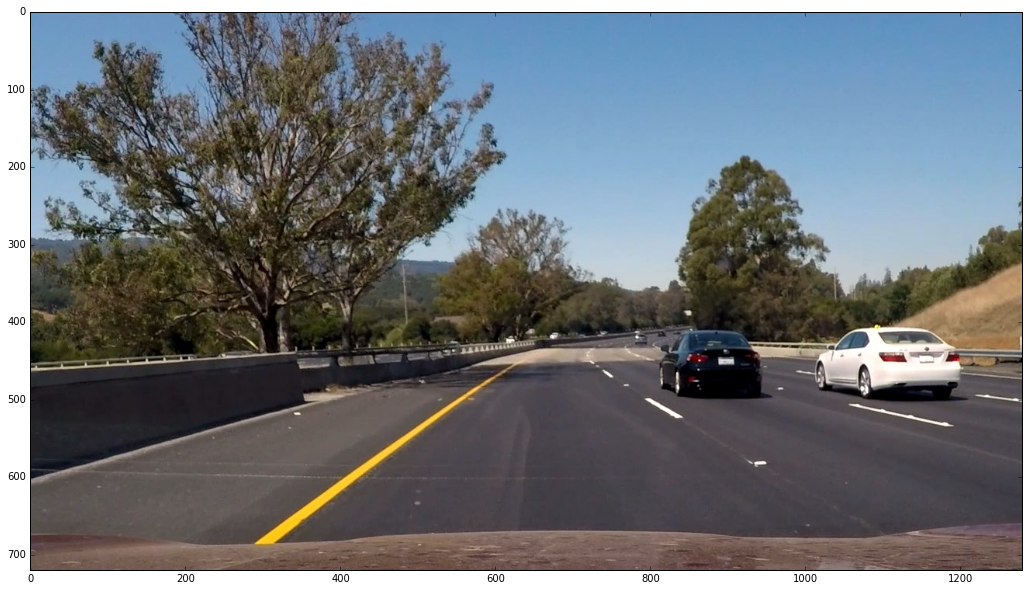

In [347]:
plt.figure(figsize=(20,10))
plt.imshow(img[:,:,::-1])

In [212]:
model_fname = 'model_fullset'
scaler, clf = joblib.load(model_fname + '_scaler.pickle'), joblib.load(model_fname + '_svc.pickle')

In [214]:
reload(utils)

<module 'utils' from '/home/huangsx/data/sdc/CarND-Vehicle-Detection/utils.py'>

In [348]:
%%time
boxes = utils.detect_vehicles_parallel(img, scaler, clf)

CPU times: user 1.74 s, sys: 1.08 s, total: 2.82 s
Wall time: 5.3 s


In [349]:
heatmap = utils.get_heatmap(img.shape, boxes, 3)

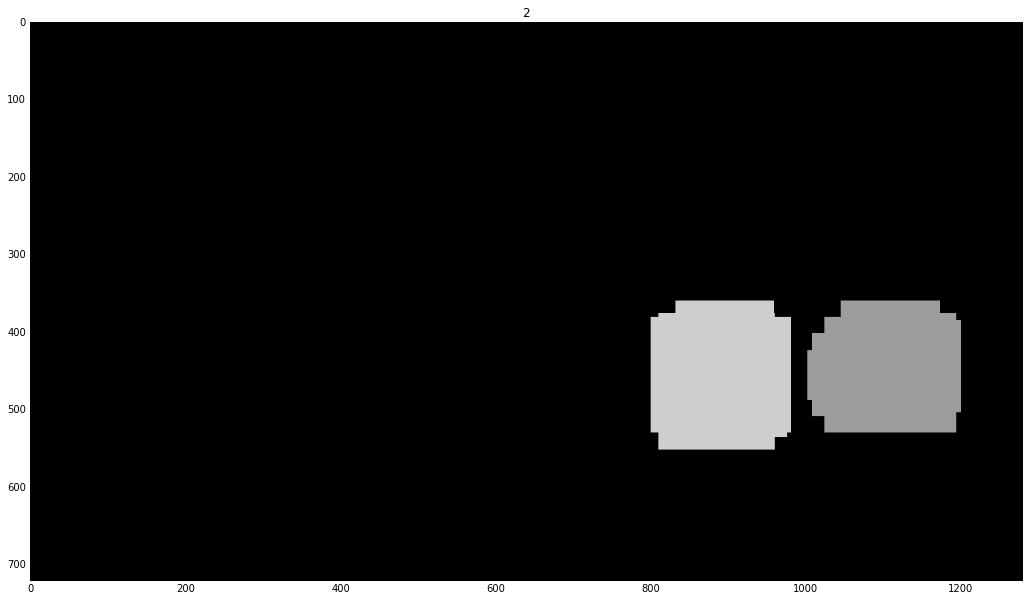

In [351]:
hm, lbls = utils.get_labels(heatmap)
plt.figure(figsize=(20,10))
plt.imshow(hm*50, cmap='gray')
plt.title(str(lbls))